[0.30806208 0.37725589 0.4464497  0.51564351 0.58483732 0.65403113
 0.72322494 0.79241875 0.86161256 0.93080637 1.00000018]
[0.30806208 0.37725589 0.4464497  0.51564351 0.58483732 0.65403113
 0.72322494 0.79241875 0.86161256 0.93080637 1.00000018]
[0.30806208 0.37725589 0.4464497  0.51564351 0.58483732 0.65403113
 0.72322494 0.79241875 0.86161256 0.93080637 1.00000018]
[0.30806208 0.37725589 0.4464497  0.51564351 0.58483732 0.65403113
 0.72322494 0.79241875 0.86161256 0.93080637 1.00000018]
[0.34569516 0.41755328 0.48711211 0.55073087 0.6179258  0.68822258
 0.75773579 0.82682936 0.89822967 0.98741388]
(4, 5000)
(4, 5000)


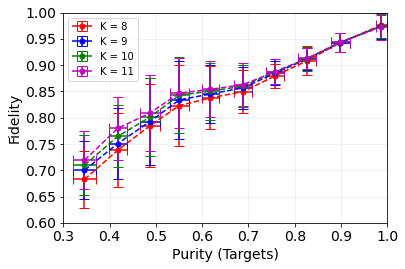

In [2]:
import sys
sys.path.insert(0, '../utils')
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d

import matplotlib.pyplot as plt
import Fidelity_Measure as fm
import Purity_Measure as pm
import Concurrence_Measure as cm
import os

from scipy import stats



# test_data_path = '../data'
tomo_test_data_file = f'../data/MA_tomo_tau_dm_5000_qs_3_alpha_TEST_0.03.pickle'
# corr_test_data_file = test_data_path + f'/corrected_testdata_qubit_size_2.pkl'
x_test, tau, dm_mle_uncorrected = pd.read_pickle(tomo_test_data_file)


kparams_values = ['8_no_truncation', '9_no_truncation', '10_no_truncation', '11_no_truncation']
K = [8, 9, 10, 11]
fidelity_list, fidelity_av, dms, pur_list, params_list = pd.read_pickle("../test_prediction_results_data_driven/fidelity_list_fid_av_pred_dm_params_alpha_0.03_k_params_['8_no_truncation', '9_no_truncation', '10_no_truncation', '11_no_truncation']_qs_3.pickle")


fid_nn = np.array(fidelity_list).reshape(4, 10, -1)
# fid_nn = np.array(fidelity_list).reshape(4, -1)
fid_nn_unfit = fid_nn[:5]
fid_nn_unfit_m = np.mean(fid_nn_unfit, axis=1)
# print(fid_nn_unfit_m)
# fid_nn_unfit_std = np.std(np.std(fid_nn_unfit, axis=1), axis=1)
# fid_nn_fit = fid_nn[5:]
# fid_nn_fit_m = np.mean(fid_nn_fit, axis=1)
# fid_nn_fit_std = np.std(fid_nn_fit, axis=1)

# con_nn = np.array(cm_list).reshape(4, 10, -1).mean(axis=1)
# con_nn = np.array(cm_list).reshape(4, -1).mean(axis=1)
pur_nn = np.array(pur_list).reshape(4, 10, -1).mean(axis=1)
# pur_nn = np.array(pur_list).reshape(4, -1).mean(axis=1)


test_pur = pm.purity(dm_mle_uncorrected)

# print(test_pur.shape)

means = []
stds = []
n_bins = 10
# bins_edges = np.arange(n_bins)
for i in range(len(kparams_values)):
    mean_values, bin_edges, _ = stats.binned_statistic(test_pur, fid_nn_unfit_m[i], statistic='mean', bins=n_bins)
    print(bin_edges)
    std_values, bin_edges, _ = stats.binned_statistic(test_pur, fid_nn_unfit_m[i], statistic='std', bins=n_bins)
    means.append(mean_values)
    stds.append(std_values)
bin_means, bin_edges, _ = stats.binned_statistic(test_pur, test_pur, statistic='mean', bins=n_bins)
bin_stds, bin_edges, _ = stats.binned_statistic(test_pur, test_pur, statistic='std', bins=n_bins)

bin_stds = np.where(bin_means+bin_stds>1, 1 - bin_means, bin_stds)
# bins_mean = [(bin_edges[i] + bin_edges[i+1])/2 for i in range(10)]
# bins_range = [(bin_edges[i+1] - bin_edges[i]) for i in range(10)]
# print(bins_mean)
# print(mean_values)
# print(std_values)
# print(bin_edges)
print(bin_means)


print (fid_nn_unfit_m.shape)
print(pur_nn.shape)

# plt.hist(values, bins=bin_edges)
colors = ['r', 'b', 'g', 'm']
for i in range(len(kparams_values)):
    plt.errorbar(bin_means, means[i], yerr=stds[i], xerr=bin_stds, fmt=f'--{colors[i]}o', ecolor=f'{colors[i]}',
                 elinewidth=1.5, linewidth=1.5, markersize=5, capsize=5, barsabove=False, lolims=False, uplims=False,
                 xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None, label=f'K = {i+8}')

# plt.errorbar(K, fid_nn_fit_m, yerr=fid_nn_fit_std, xerr=None, fmt='-ro', ecolor='r',
#              elinewidth=1.5, linewidth=1.5, markersize=5, capsize=5, barsabove=False, lolims=False, uplims=False,
#              xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None, label='Fitted (NN)')


# plt.errorbar(K, fid_nn_unfit_m, yerr=fid_nn_unfit_std, xerr=None, fmt='-bo', ecolor='b',
#              elinewidth=1.5, linewidth=1.5, markersize=5, capsize=5, barsabove=False, lolims=False, uplims=False,
#              xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None, label=r'Unfitted (NN)')
#
#
fs = 14
plt.grid(alpha=0.2)
plt.xlabel(r'Purity (Targets)', fontsize=fs)
plt.ylabel('Fidelity', fontsize=fs)
plt.legend()
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
#
# # plt.axis([-0.7e6, 6e6, 0.55, 1.02])
# plt.subplots_adjust(bottom=0.6, left=0.6)
plt.axis([.3, 1., 0.6, 1.])
plt.subplots_adjust(bottom=0.15, left=0.15)
#
# plt.savefig('fid_vs_purity_MA_MA_alpha_0.03.svg', dpi=600)
# plt.savefig('fid_vs_purity_MA_MA_alpha_0.03.png', dpi=600)


plt.show()